## This is my analysis and visualizations for the Amazon Fire TV Stick review data

### Import Libraries

In [70]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import researchpy as rp
from scipy import stats
import ast

### Import review data csv and get all columns to show up right

In [71]:
# Read from CSV
df = pd.read_csv('Reviews_cleaned.csv', index_col = 0, dtype = {'url':'category'}, parse_dates = ['date'])

In [72]:
# Set word_tokens as lists instead of strings
df['word_tokens'] = df['word_tokens'].apply(ast.literal_eval)

### Split data into separate data frames on rating and take an initial look at the basic statistics

In [73]:
# Create data frames divided by rating
df1 = df[df['rating']==1]
df2 = df[df['rating']==2]
df3 = df[df['rating']==3]
df4 = df[df['rating']==4]
df5 = df[df['rating']==5]

In [74]:
df1.describe()

page_number   rating  varified_purchase  found_helpful  \
count  12166.000000  12166.0       12166.000000   12166.000000   
mean    1840.016932      1.0           0.956354       0.901118   
std     1280.093031      0.0           0.204315       6.418416   
min        1.000000      1.0           0.000000       0.000000   
25%      546.250000      1.0           1.000000       0.000000   
50%     1820.500000      1.0           1.000000       0.000000   
75%     3014.000000      1.0           1.000000       1.000000   
max     3773.000000      1.0           1.000000     578.000000   

       body_word_count  
count     12166.000000  
mean         46.498685  
std          62.742396  
min           1.000000  
25%          12.000000  
50%          28.000000  
75%          57.000000  
max        2112.000000

In [75]:
df2.describe()

page_number  rating  varified_purchase  found_helpful  body_word_count
count  6164.000000  6164.0        6164.000000    6164.000000      6163.000000
mean   1538.742700     2.0           0.967229       0.389033        51.747526
std    1168.056516     0.0           0.178051       2.036543        66.973612
min       1.000000     2.0           0.000000       0.000000         1.000000
25%     447.000000     2.0           1.000000       0.000000        14.000000
50%    1401.000000     2.0           1.000000       0.000000        32.000000
75%    2432.000000     2.0           1.000000       0.000000        63.000000
max    3773.000000     2.0           1.000000      70.000000      1030.000000

In [76]:
df3.describe()

page_number  rating  varified_purchase  found_helpful  body_word_count
count  9542.000000  9542.0        9542.000000    9542.000000      9541.000000
mean   1514.512157     3.0           0.977258       0.251415        45.569647
std    1108.860006     0.0           0.149086       2.527904        59.571549
min       2.000000     3.0           0.000000       0.000000         1.000000
25%     490.250000     3.0           1.000000       0.000000        13.000000
50%    1391.000000     3.0           1.000000       0.000000        28.000000
75%    2353.000000     3.0           1.000000       0.000000        55.000000
max    3773.000000     3.0           1.000000     189.000000      1331.000000

In [77]:
df4.describe()

page_number   rating  varified_purchase  found_helpful  \
count  22294.000000  22294.0       22294.000000   22294.000000   
mean    1752.999237      4.0           0.988427       0.081233   
std     1080.117405      0.0           0.106954       1.238954   
min        1.000000      4.0           0.000000       0.000000   
25%      789.250000      4.0           1.000000       0.000000   
50%     1725.000000      4.0           1.000000       0.000000   
75%     2682.000000      4.0           1.000000       0.000000   
max     3773.000000      4.0           1.000000     162.000000   

       body_word_count  
count     22291.000000  
mean         29.965412  
std          47.247832  
min           1.000000  
25%           7.000000  
50%          16.000000  
75%          35.000000  
max        1305.000000

In [78]:
df5.describe()

page_number    rating  varified_purchase  found_helpful  \
count  135332.000000  135332.0      135332.000000  135332.000000   
mean     1915.733522       5.0           0.988399       0.376430   
std      1037.463278       0.0           0.107082      90.763956   
min         1.000000       5.0           0.000000       0.000000   
25%      1025.000000       5.0           1.000000       0.000000   
50%      1933.000000       5.0           1.000000       0.000000   
75%      2822.000000       5.0           1.000000       0.000000   
max      3773.000000       5.0           1.000000   32620.000000   

       body_word_count  
count    135309.000000  
mean         18.437561  
std          30.640912  
min           1.000000  
25%           4.000000  
50%          10.000000  
75%          21.000000  
max        2057.000000

### Create word counts so we can take a look at word frequency 

In [103]:
def word_counter(column):
    word_count = Counter()
    column.apply(word_count.update)
    return word_count

In [105]:
# Create counter object for df
word_count = word_counter(df['word_tokens'])

# Create counter object for df1
word_count_1 = word_counter(df1['word_tokens'])

# Create counter object for df2
word_count_2 = word_counter(df2['word_tokens'])

# Create counter object for df3
word_count_3 = word_counter(df3['word_tokens'])

# Create counter object for df4
word_count_4 = word_counter(df4['word_tokens'])

# Create counter object for df5
word_count_5 = word_counter(df5['word_tokens'])

Let's take a look at frequency via word clouds

In [157]:
def word_cloud(word_count, title = None):
    # Set figure size and dpi
    plt.figure(figsize=(8,4), dpi=280)

    # Create wordcloud for reviewsm word tokens in df1
    wordcloud = WordCloud(width=1920, height=1040, background_color='white').generate_from_frequencies(word_count)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, fontdict={'fontsize':30, 'fontweight':'bold'})    
    plt.show()

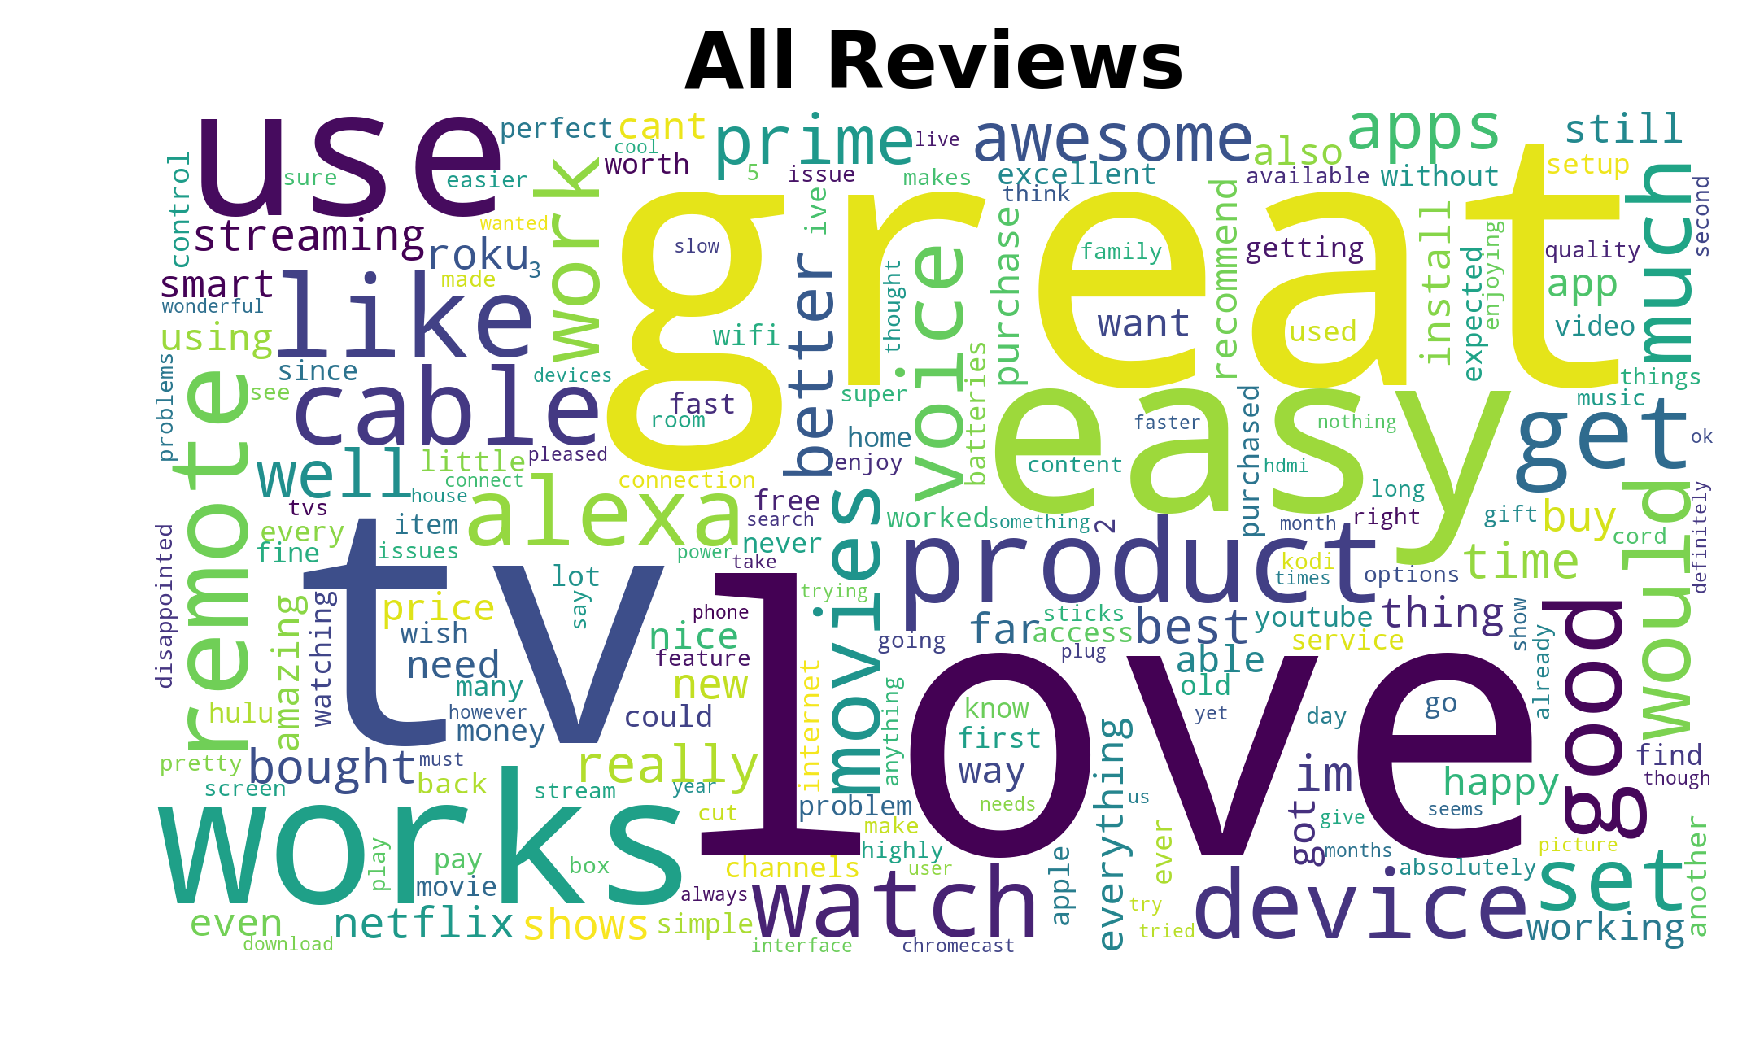

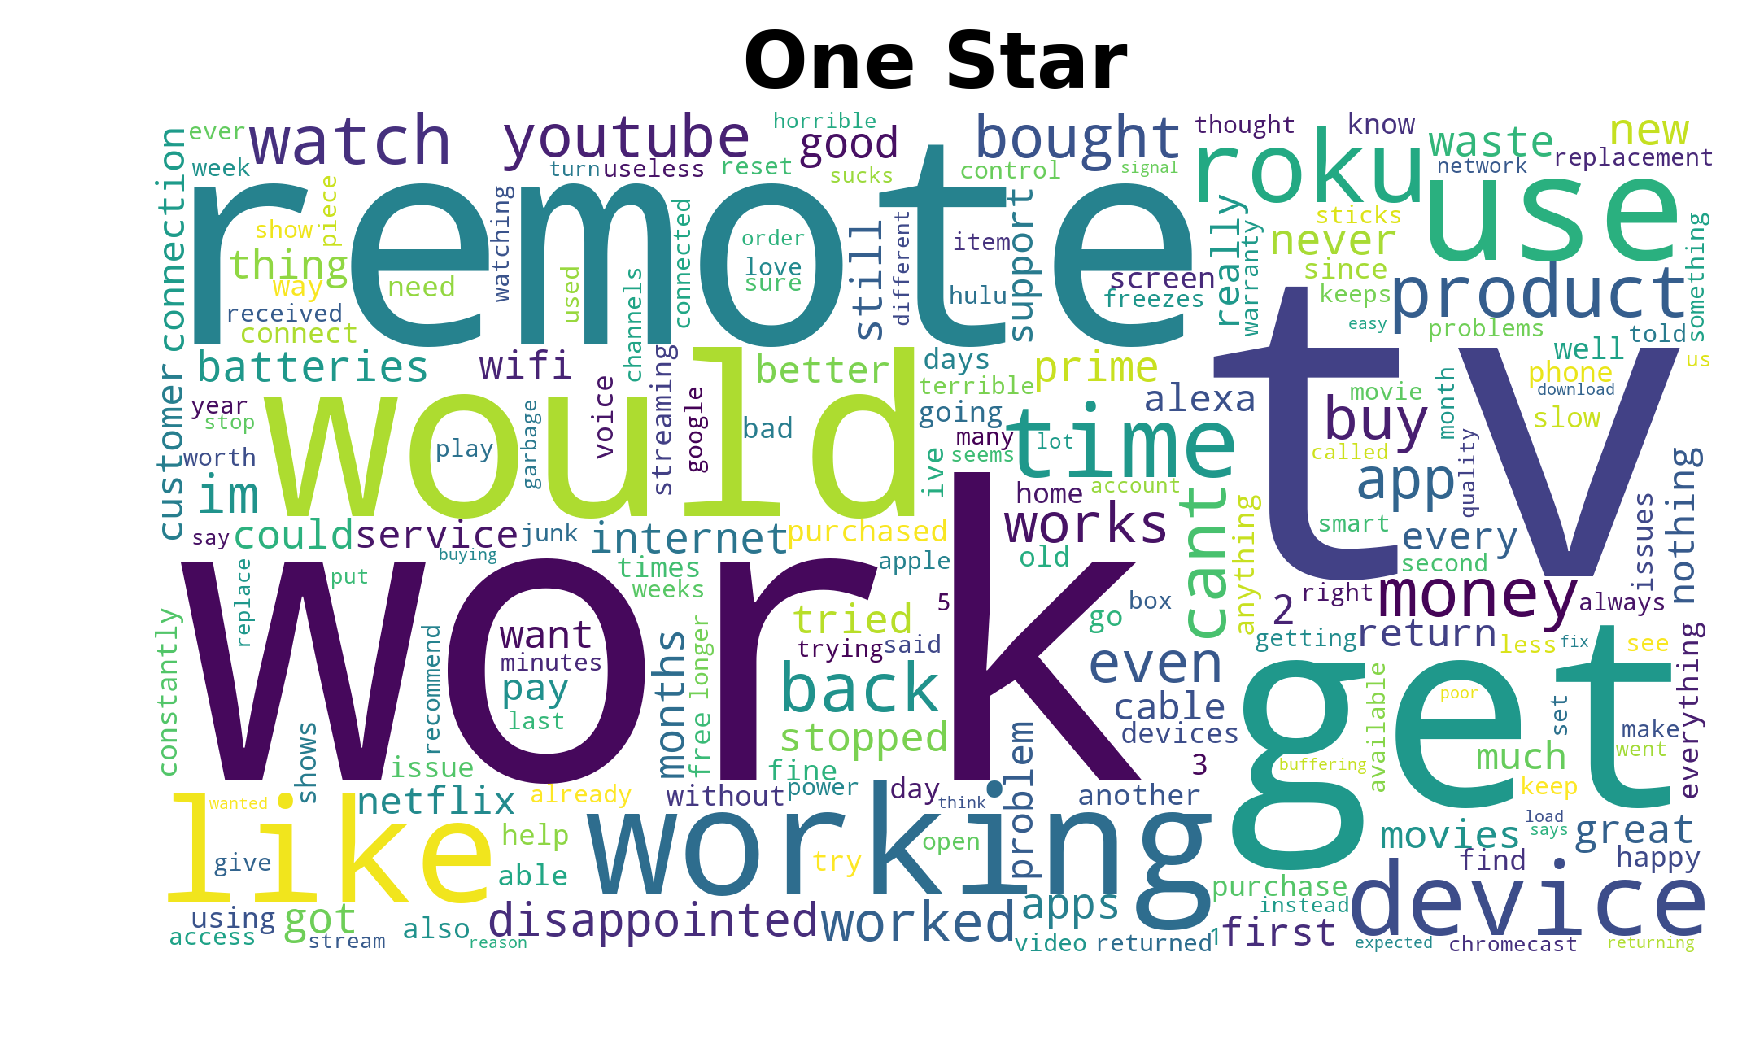

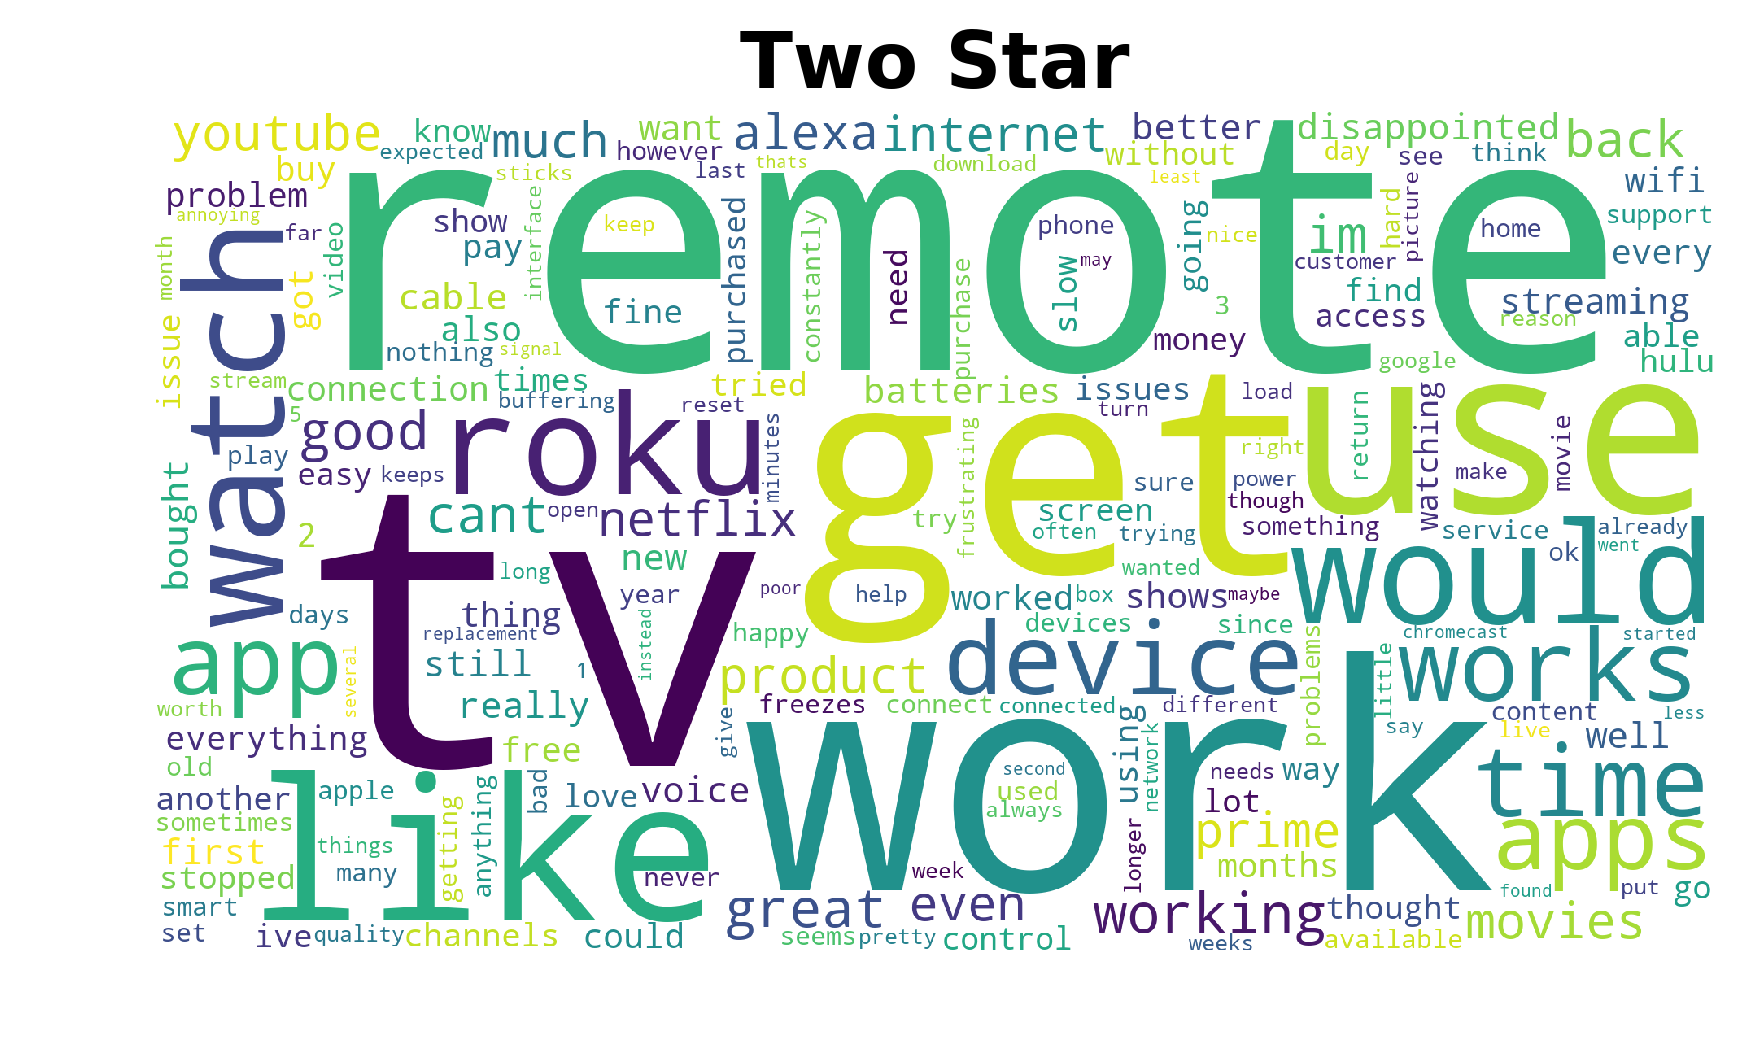

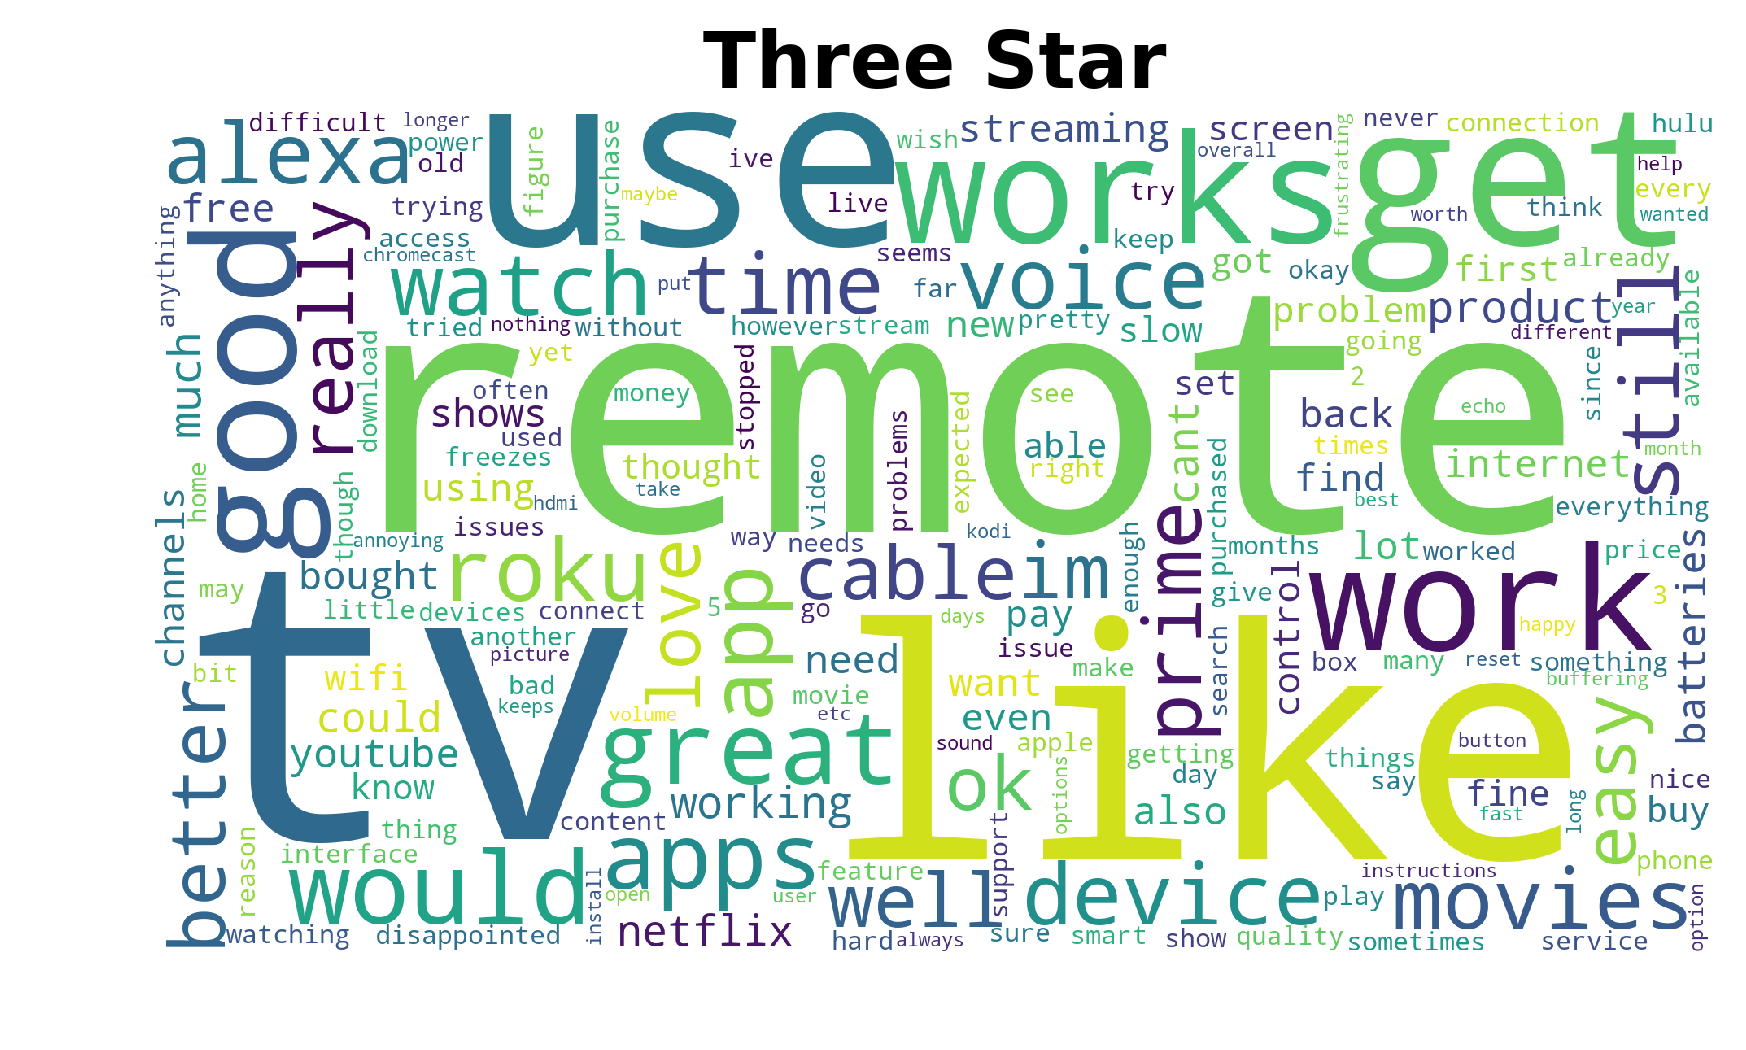

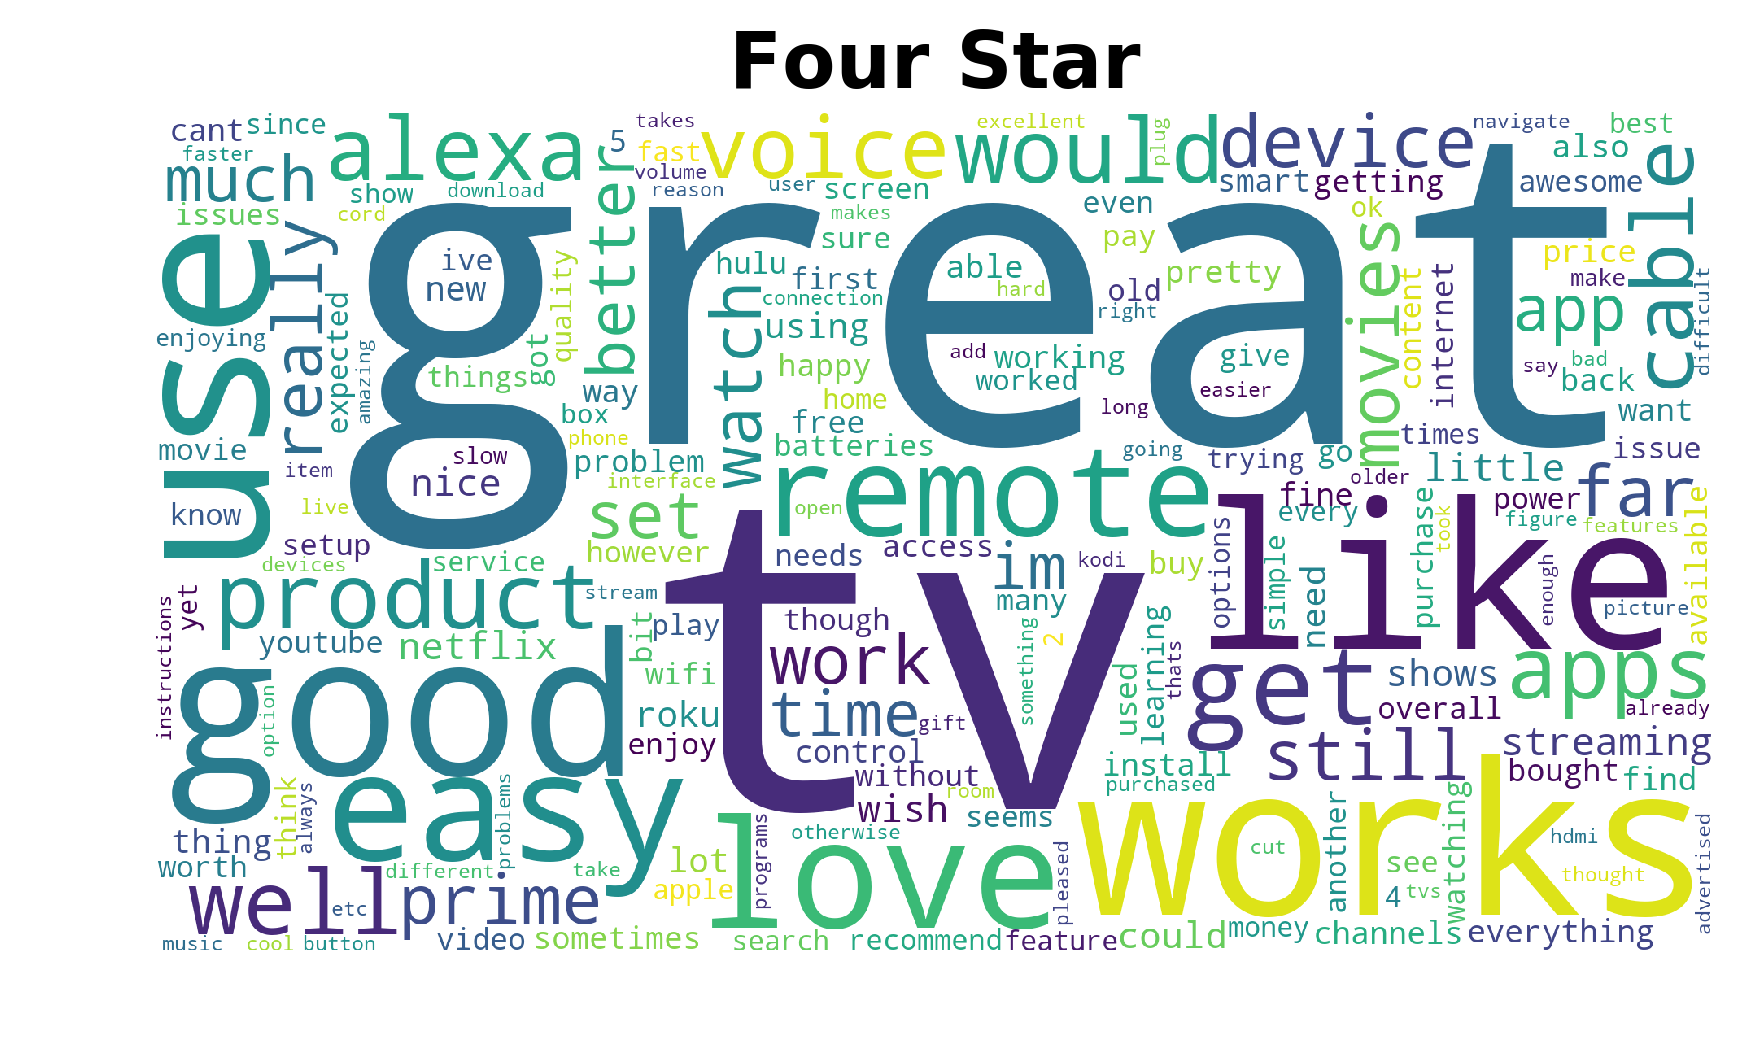

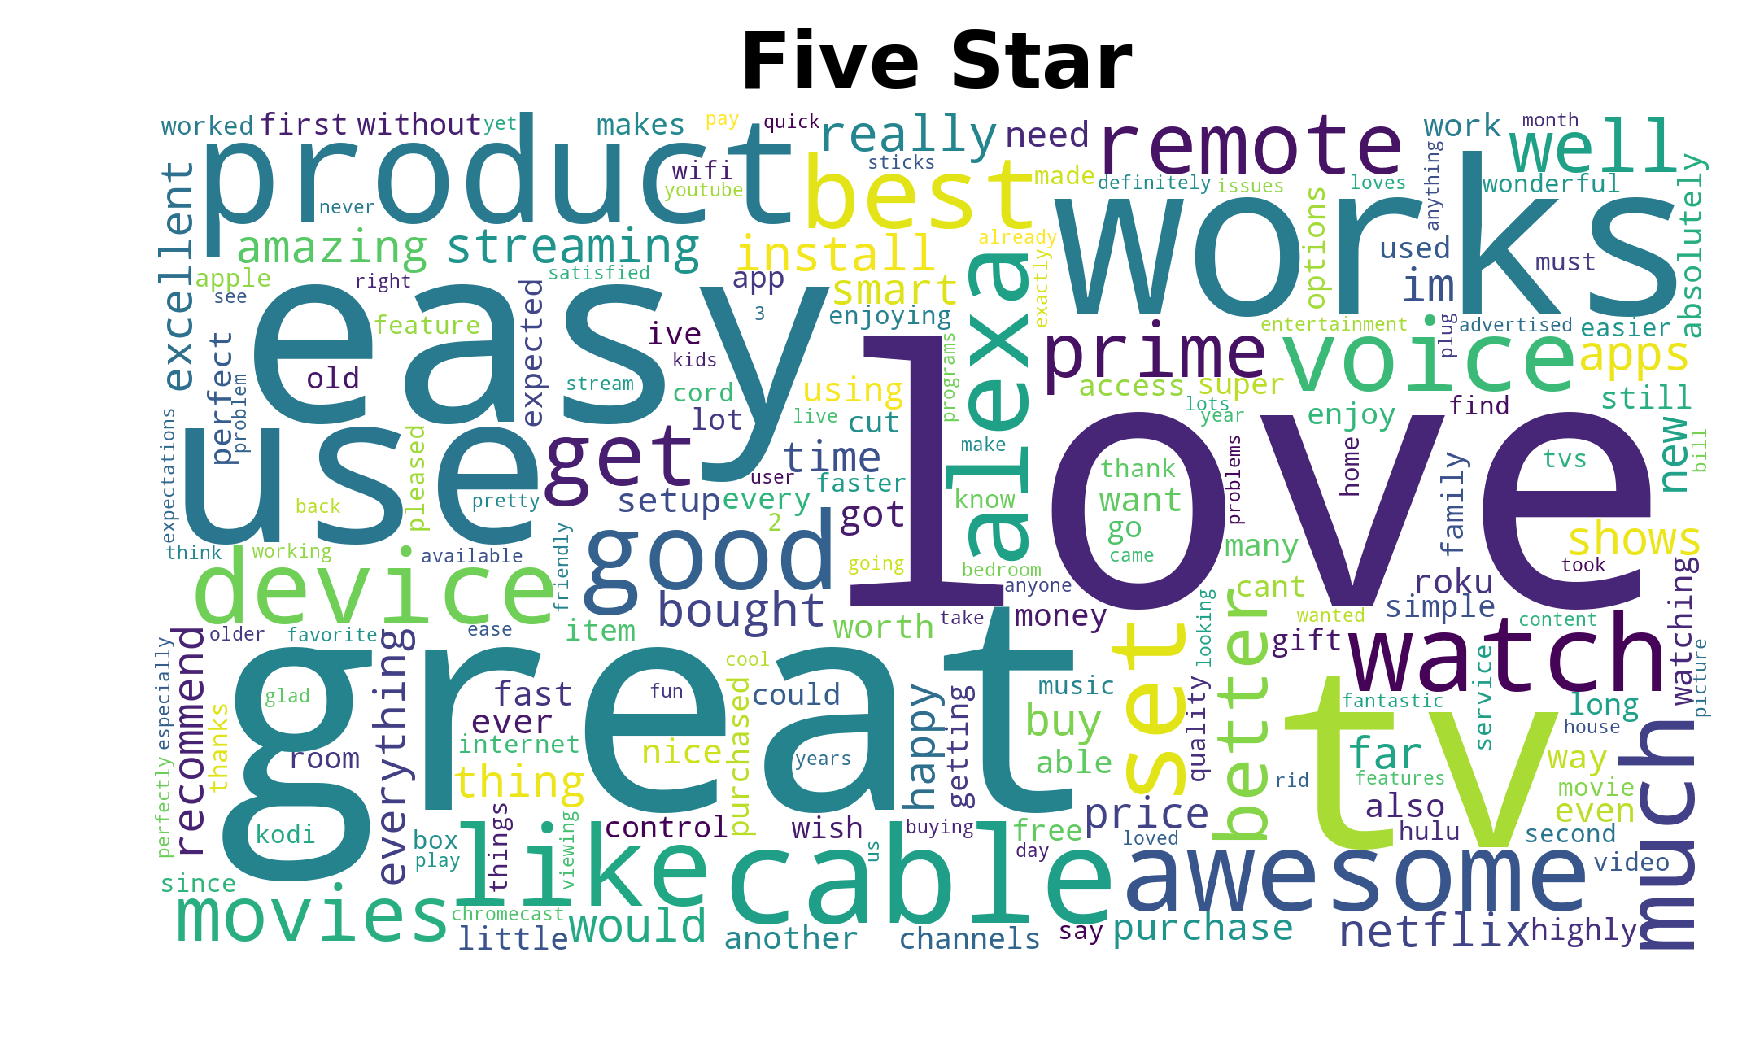

In [155]:
word_cloud(word_count, 'All Reviews')

word_cloud(word_count_1, 'One Star')

word_cloud(word_count_2, 'Two Star')

word_cloud(word_count_3, 'Three Star')

word_cloud(word_count_4, 'Four Star')

word_cloud(word_count_5, 'Five Star')

It is interesting that the word "remote" shows up more often in reviews 1-3, almost like one of the most common issues to speak of is something with the remote. So lets take a closer look at that.

In [143]:
# Create df with reviews that have ratings 1-3 and that contain the word "remote"
df_remote = df[((df['rating'] == 1) | (df['rating'] == 2) | (df['rating'] == 3)) & (df['all_text'].str.contains('remote'))]

# Create counter object for df_remote
remote_1_3_stars = word_counter(df_remote['word_tokens'])

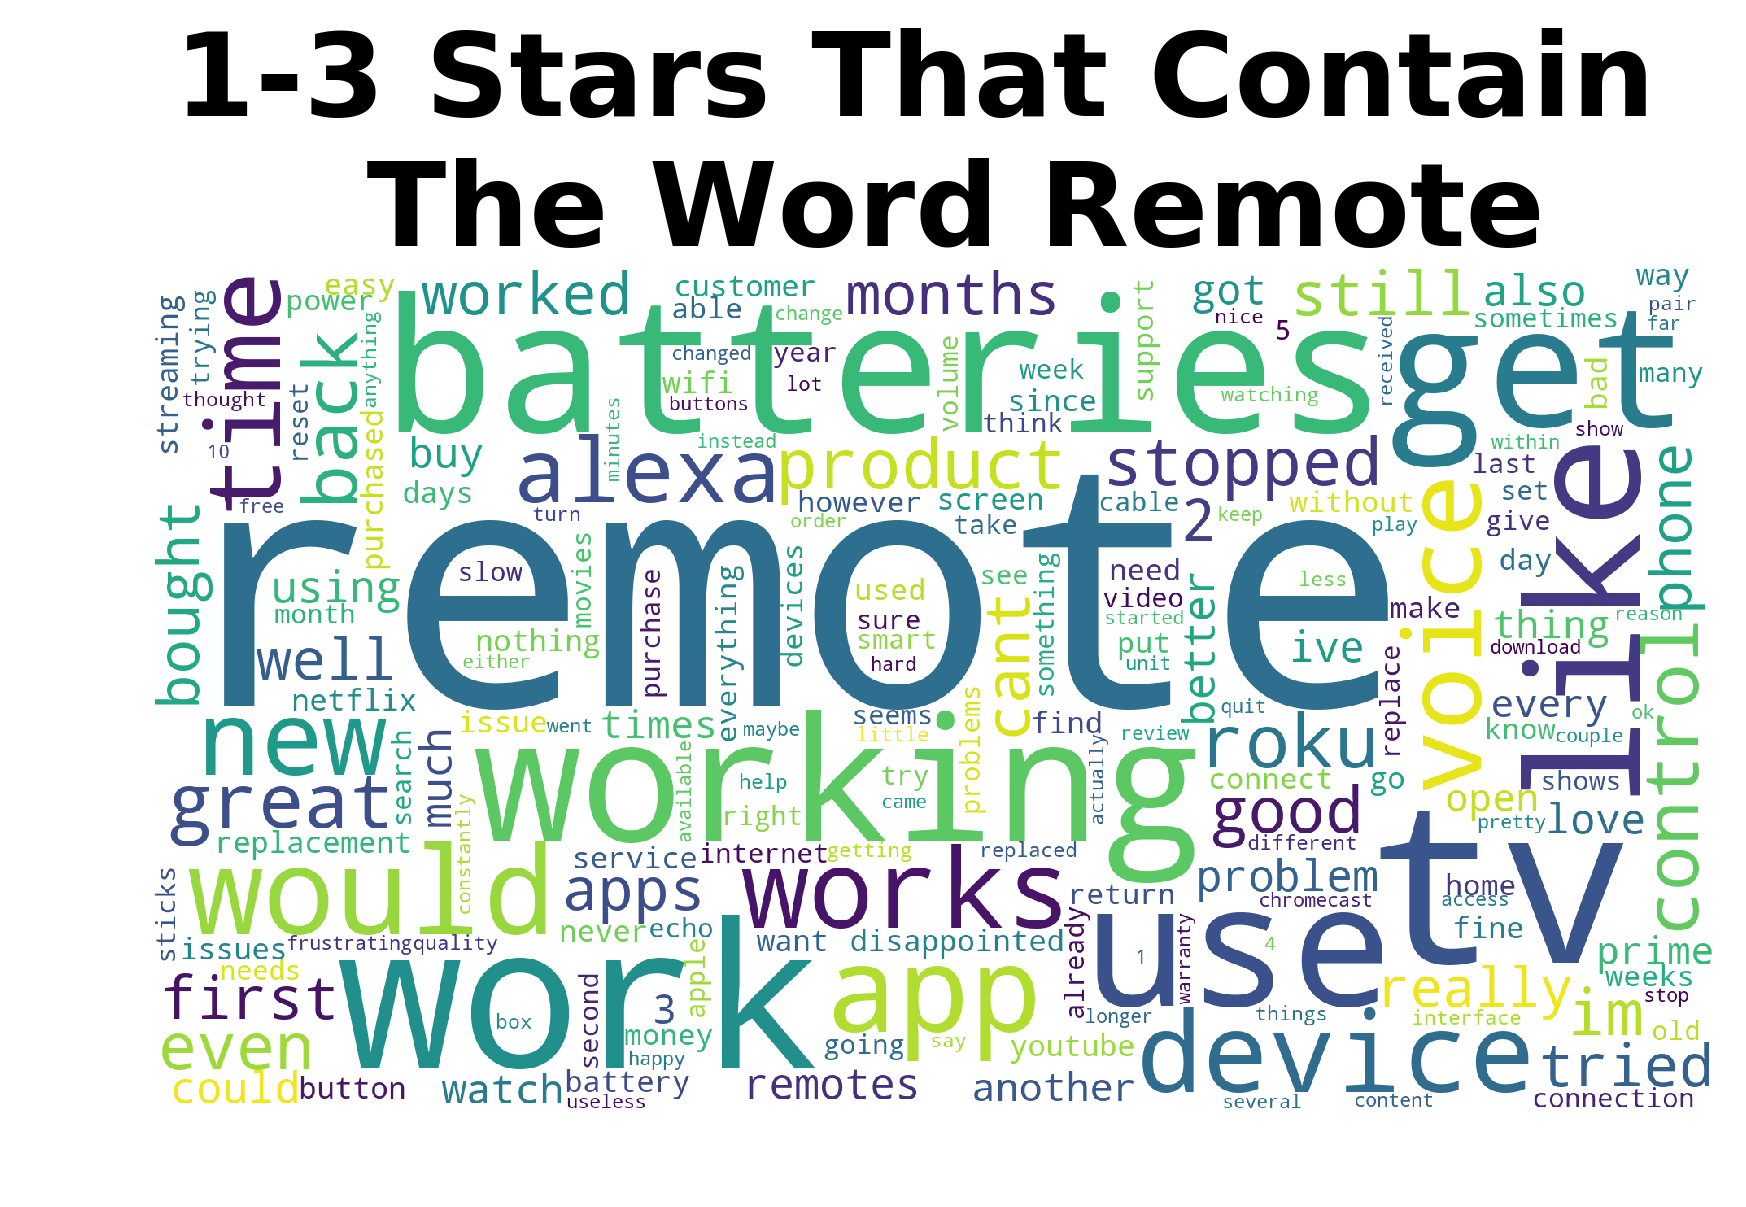

In [162]:
word_cloud(remote_1_3_stars, '1-3 Stars That Contain \n The Word Remote')

Well that is interesting indeed. It looks like at least a good number of the people that have a problem with the remote it involves the batteries.  
  
Let's take a look further into what the percentages of the people who talk about the remote compared to the rest of the reviews.

In [164]:
ratings = (1,2,3,4,5)
key_word = []
for i in ratings:
    row = []
    key_word_count = len(df[(df['rating'] == i) & (df['all_text'].str.contains('remote'))])
    rating_count = len(df[df['rating']== i])
    row.append(i)
    row.append(round((key_word_count/rating_count)*100,2))
    row.append(round(key_word_count/len(df)*100,2))
    key_word.append(row)
dfr = pd.DataFrame(key_word, columns=['rating','percent_remote', 'percent_of_total'])
dfr

rating  percent_remote  percent_of_total
0       1           14.80              0.97
1       2           17.65              0.59
2       3           15.50              0.80
3       4            9.33              1.12
4       5            3.93              2.87

In [166]:
# Set up the seaborn style
sns.set_context("talk", font_scale=1)
sns.set_style('whitegrid')
sns.set_palette('RdYlGn')
sns.set_context("poster")

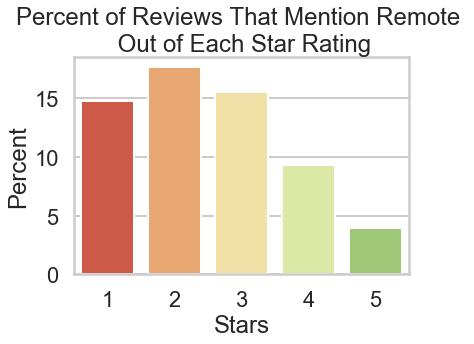

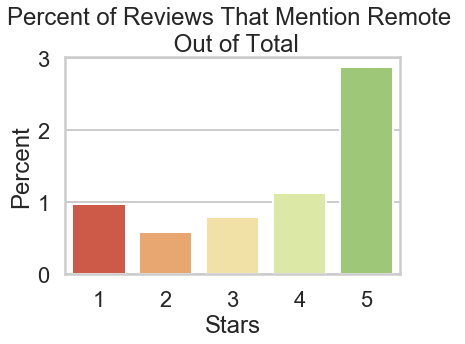

In [169]:
sns.barplot(x=dfr['rating'], y=dfr['percent_remote'])
plt.xlabel('Stars')
plt.ylabel('Percent')
plt.title('Percent of Reviews That Mention Remote \n Out of Each Star Rating')
plt.show()

sns.barplot(x=dfr['rating'], y=dfr['percent_of_total'])
plt.xlabel('Stars')
plt.ylabel('Percent')
plt.title('Percent of Reviews That Mention Remote \n Out of Total')
plt.show()

In [170]:
dfremote = df
dfremote['remote?'] = df['all_text'].str.contains('remote')

In [53]:
rp.summary_cat(dfremote[['remote?', 'rating']])

Variable  Outcome   Count  Percent
0  remote?        0  173732    93.66
1                 1   11766     6.34
2   rating        5  135332    72.96
3                 4   22294    12.02
4                 1   12166     6.56
5                 3    9542     5.14
6                 2    6164     3.32

In [54]:
pd.crosstab(dfremote['rating'], dfremote['remote?'])

remote?   False  True 
rating                
1         10365   1801
2          5076   1088
3          8063   1479
4         20214   2080
5        130014   5318

In [56]:
table, results = rp.crosstab(dfremote['rating'], dfremote['remote?'], prop = 'col', test = 'chi-square')

table

remote?                
         False    True     All
rating                        
1         5.97   15.31    6.56
2         2.92    9.25    3.32
3         4.64   12.57    5.14
4        11.64   17.68   12.02
5        74.84   45.20   72.96
All     100.00  100.00  100.00

In [57]:
results

Chi-square test    results
0  Pearson Chi-square ( 4.0) =   5801.1896
1                    p-value =      0.0000
2                 Cramer's V =      0.1768